In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
pgd_path = '/hhd3/ld/data/Painter_root/nyu_depth/reimp_PGD10_8/attack_B'
fgsm_path = '/hhd3/ld/data/Painter_root/nyu_depth/adv_data_B/FGSM_8'

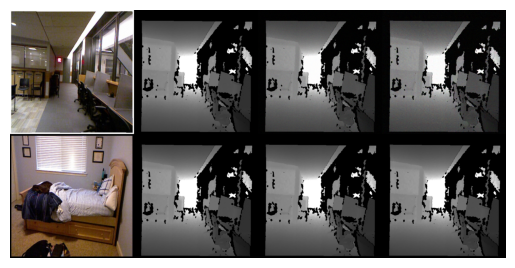

In [36]:
i = 6
clean_img = np.load(f'{pgd_path}/img2_prompt_{i}.npy')
clean_tgt = np.load(f'{pgd_path}/tgt2_prompt_{i}.npy')
fgsm_tgt = np.load(f'{fgsm_path}/tgt2_prompt_{i}_adv.npy')
pgd_tgt = np.load(f'{pgd_path}/tgt2_prompt_{i}_adv.npy')

test_img = np.concatenate((clean_img, clean_tgt, fgsm_tgt, pgd_tgt), axis=1)
plt.axis('off')
# plt.title(f'{attack_id}: perturbation={epsilon}/255')
plt.imshow(test_img)

In [37]:
fgsm_tgt - clean_tgt

array([[[0.        , 0.        , 0.00679402],
        [0.02813833, 0.00937522, 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.02461942],
        [0.        , 0.        , 0.        ],
        [0.00817219, 0.        , 0.        ]],

       [[0.        , 0.0137233 , 0.        ],
        [0.00414384, 0.00839021, 0.01536097],
        [0.        , 0.00955965, 0.        ],
        ...,
        [0.        , 0.01349528, 0.        ],
        [0.        , 0.        , 0.02279574],
        [0.        , 0.        , 0.01830585]],

       [[0.00777946, 0.        , 0.00532383],
        [0.00932103, 0.        , 0.00196424],
        [0.01668926, 0.        , 0.03034562],
        ...,
        [0.        , 0.01393668, 0.02292934],
        [0.0104929 , 0.00251018, 0.0022783 ],
        [0.        , 0.00622939, 0.        ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [38]:
pgd_tgt - clean_tgt

array([[[0.03137255, 0.        , 0.        ],
        [0.03137255, 0.        , 0.01275657],
        [0.03137255, 0.        , 0.        ],
        ...,
        [0.01568627, 0.01568627, 0.02352941],
        [0.03137255, 0.        , 0.        ],
        [0.01568627, 0.02137568, 0.01568627]],

       [[0.01568627, 0.00784314, 0.        ],
        [0.00784314, 0.02352941, 0.02352941],
        [0.00784314, 0.03137255, 0.02352941],
        ...,
        [0.        , 0.03137255, 0.01568627],
        [0.        , 0.01568627, 0.01615504],
        [0.        , 0.00784314, 0.00784314]],

       [[0.03137255, 0.01568627, 0.        ],
        [0.02352941, 0.02352941, 0.02352941],
        [0.00784314, 0.01568627, 0.03137255],
        ...,
        [0.02352941, 0.03137255, 0.02352941],
        [0.01568627, 0.01568627, 0.02352941],
        [0.00784314, 0.02352941, 0.0153548 ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [39]:
pgd_tgt - fgsm_tgt

array([[[ 0.03137255,  0.        , -0.00679402],
        [ 0.00323422, -0.00937522,  0.01275657],
        [ 0.03137255,  0.        ,  0.        ],
        ...,
        [ 0.01568627,  0.01568627, -0.00109001],
        [ 0.03137255,  0.        ,  0.        ],
        [ 0.00751408,  0.02137568,  0.01568627]],

       [[ 0.01568627, -0.00588017,  0.        ],
        [ 0.0036993 ,  0.0151392 ,  0.00816844],
        [ 0.00784314,  0.0218129 ,  0.02352941],
        ...,
        [ 0.        ,  0.01787727,  0.01568627],
        [ 0.        ,  0.01568627, -0.0066407 ],
        [ 0.        ,  0.00784314, -0.01046271]],

       [[ 0.02359309,  0.01568627, -0.00532383],
        [ 0.01420838,  0.02352941,  0.02156518],
        [-0.00884612,  0.01568627,  0.00102693],
        ...,
        [ 0.02352941,  0.01743587,  0.00060007],
        [ 0.00519337,  0.01317609,  0.02125111],
        [ 0.00784314,  0.01730002,  0.0153548 ]],

       ...,

       [[ 0.        ,  0.        ,  0.        ],
        [ 0

In [40]:
clean_in_fgsm = np.load(f'{fgsm_path}/tgt2_prompt_{i}.npy')
clean_in_pgd = np.load(f'{pgd_path}/tgt2_prompt_{i}.npy')

In [41]:
clean_tgts = np.array([np.load(f'{pgd_path}/tgt2_prompt_{i}.npy')[:448,:,:] for i in range(67)])
fgsm_tgts = [np.load(f'{fgsm_path}/tgt2_prompt_{i}_adv.npy')[:448,:,:] for i in range(67)]
pgd_tgts = [np.load(f'{pgd_path}/tgt2_prompt_{i}_adv.npy')[:448,:,:] for i in range(67)]

In [45]:
fgsm_tgts = np.array(fgsm_tgts)

In [46]:
pgd_tgts = np.array(pgd_tgts)

In [47]:
import torch.nn.functional as F
import torch
kl_loss = F.kl_div(torch.from_numpy(clean_tgts).log_softmax(dim=-1), torch.from_numpy(fgsm_tgts).softmax(dim=-1), reduction='batchmean') 
kl_loss1 = F.kl_div(torch.from_numpy(clean_tgts).log_softmax(dim=-1), torch.from_numpy(pgd_tgts).softmax(dim=-1), reduction='batchmean') 
print(kl_loss, kl_loss1)
print(kl_loss1>kl_loss)

tensor(15.7332, dtype=torch.float64) tensor(17.8785, dtype=torch.float64)
tensor(True)


In [48]:
print(clean_tgts.shape, fgsm_tgts.shape, pgd_tgts.shape)

(67, 448, 448, 3) (67, 448, 448, 3) (67, 448, 448, 3)


(67, 448, 448, 3) (67, 448, 448, 3) (67, 448, 448, 3)
(67, 602112) (67, 602112) (67, 602112)


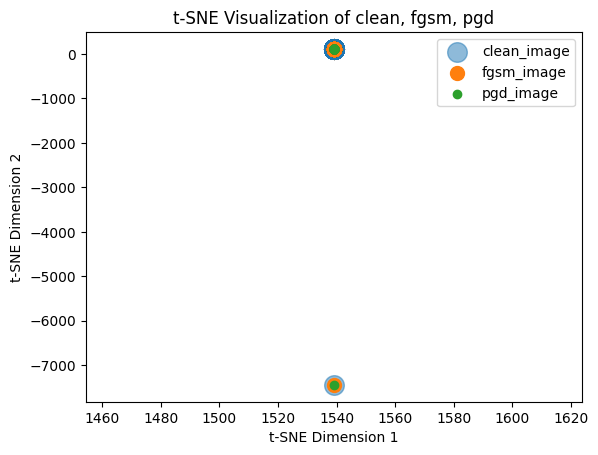

In [34]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


print(clean_tgts.shape, fgsm_tgts.shape, pgd_tgts.shape)

# 假设 embeddings1 和 embeddings2 是两个形状为 [640, 577, 768] 的 NumPy 数组
embeddings1 = torch.from_numpy(clean_tgts).flatten(1).numpy()
embeddings2 = torch.from_numpy(fgsm_tgts).flatten(1).numpy()
embeddings3 = torch.from_numpy(pgd_tgts).flatten(1).numpy()

print(embeddings1.shape, embeddings2.shape, embeddings3.shape)

# # 计算每个嵌入的均值，将形状降至 [640, 768]
embeddings1_mean = embeddings1
embeddings2_mean = embeddings2
embeddings3_mean = embeddings3

# 使用 t-SNE 将嵌入降至 2D
tsne = TSNE(n_components=2, random_state=0)
embeddings1_2d = tsne.fit_transform(embeddings1_mean)
embeddings2_2d = tsne.fit_transform(embeddings2_mean)
embeddings3_2d = tsne.fit_transform(embeddings3_mean)

# 绘制降维后的嵌入
plt.scatter(embeddings1_2d[:, 0], embeddings1_2d[:, 1], label="clean_image", alpha=0.5, s=200)
plt.scatter(embeddings2_2d[:, 0], embeddings2_2d[:, 1], label="fgsm_image", alpha=1, s=100)
plt.scatter(embeddings3_2d[:, 0], embeddings3_2d[:, 1], label="pgd_image", alpha=1)
plt.legend()
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE Visualization of clean, fgsm, pgd")
plt.show()


In [15]:
1.714-0.288+2.778

4.204

In [16]:
0.950-0.445, 0.950-0.299

(0.5049999999999999, 0.651)